In [1]:
#importando bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#trazendo nosso csv para um dataframe do pandas
dados_df = pd.read_csv('fortal_dados_climaticos.csv', sep=';', encoding='utf-8', low_memory = False)

In [3]:
#tratamento de dados -> necesario para o python endenda o que esta os
#tipos de dados que iremos utilizar
#display(dados_df)
dados_df['Data'] = pd.to_datetime(dados_df['Data'], dayfirst=True, errors='coerce')

dados_df = dados_df.dropna()

display(dados_df)

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
13,2024-05-01,1300,"29,8","30,2","27,9","63,0","75,0","63,0","21,9","23,8","21,9","1009,1","1009,5","1009,1","2,4","125,0","8,8","1572,90","0,0"
14,2024-05-01,1400,"29,8","30,2","29,4","62,0","67,0","60,0","21,7","22,9","21,3","1008,7","1009,1","1008,7","2,7","137,0","10,4","1597,10","0,0"
15,2024-05-01,1500,"31,0","31,1","29,8","59,0","65,0","59,0","22,1","23,1","21,7","1007,5","1008,7","1007,5","2,6","123,0","6,5","1859,90","0,2"
16,2024-05-01,1600,"30,1","32,2","30,1","61,0","63,0","56,0","21,9","23,6","21,1","1006,9","1007,5","1006,9","1,9","126,0","6,7","2074,40","0,0"
17,2024-05-01,1700,"31,2","31,9","30,1","57,0","63,0","56,0","21,8","23,3","21,3","1006,3","1006,9","1006,2","3,4","107,0","7,6","1840,70","0,0"
18,2024-05-01,1800,"31,0","31,5","30,4","56,0","61,0","55,0","21,3","22,4","21,0","1006,1","1006,4","1006,1","3,1","107,0","7,7","1751,40","0,2"
19,2024-05-01,1900,"30,2","31,1","29,9","61,0","63,0","55,0","21,8","22,4","20,9","1006,1","1006,2","1006,0","2,6","105,0","7,1","1244,30","0,0"
20,2024-05-01,2000,"29,3","30,2","28,9","67,0","68,0","61,0","22,5","22,7","21,6","1006,4","1006,4","1006,1","1,7","104,0","5,6","462,70","0,0"
37,2024-05-02,1300,"29,6","30,4","29,1","67,0","74,0","64,0","22,8","24,2","22,4","1008,2","1008,5","1008,2","2,3","136,0","6,0","1862,80","0,2"
38,2024-05-02,1400,"30,6","31,1","29,5","60,0","68,0","59,0","21,8","23,6","21,7","1007,7","1008,3","1007,7","2,1","141,0","6,8","1750,10","0,0"


In [4]:
#lista de colinas numericos
colunas_numericas = [
"Temp. Ins. (C)", "Temp. Max. (C)", "Temp. Min. (C)", "Umi. Ins. (%)",
"Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)", "Pto Orvalho Max. (C)",
"Pto Orvalho Min. (C)", "Pressao Ins. (hPa)", "Pressao Max. (hPa)",
"Pressao Min. (hPa)", "Vel. Vento (m/s)", "Dir. Vento (m/s)", "Raj. Vento (m/s)",
"Radiacao (KJ/m²)", "Chuva (mm)"]

In [5]:
#converte as benditas virgulas (,) em ponto(.)
for col in colunas_numericas:
    #troca a virgula pelo ponto
    dados_df[col] = dados_df[col].astype(str).str.replace(',','.', regex=False)
    #converte a string que representa valores reais em numerico (float)
    dados_df[col] = pd.to_numeric(dados_df[col], errors='coerce')

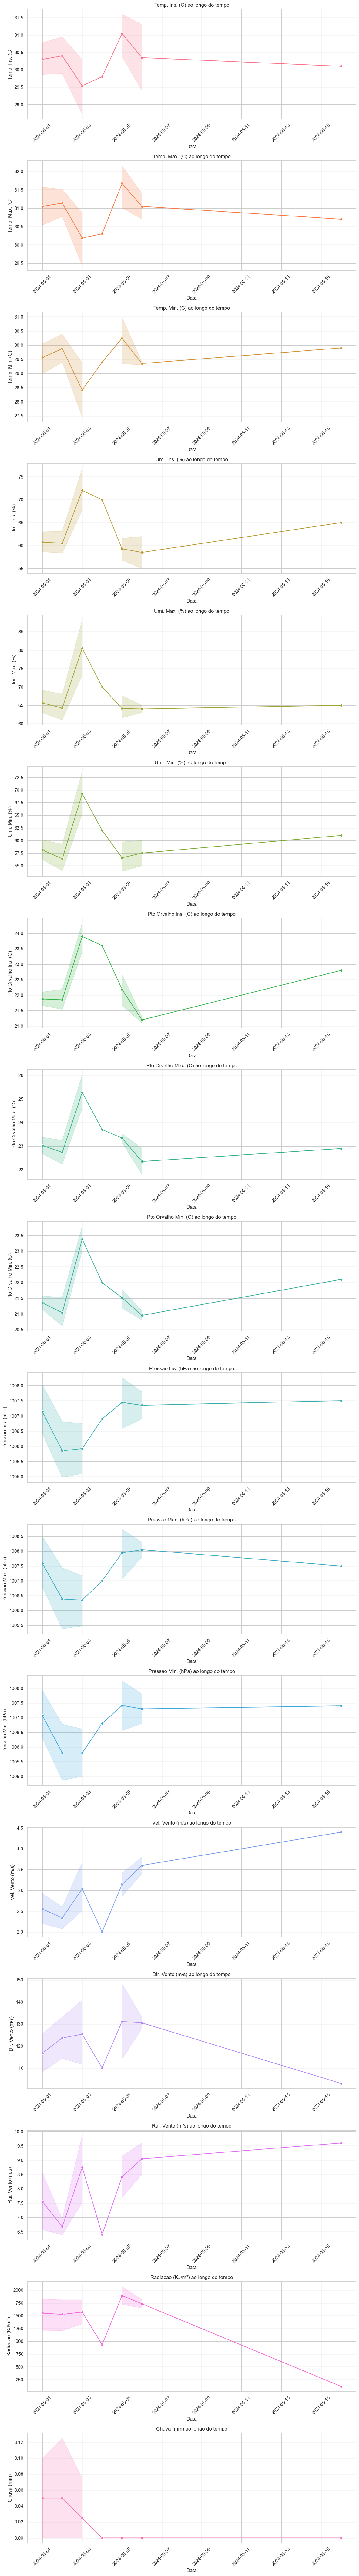

In [6]:
#plantando Tudo...
#configura o stylo do grafico
sns.set(style='whitegrid')
#cria uma paleta de cores com estilo 'husl', com uma cor diferente para cada coluna numericas
colors = sns.color_palette('husl', len(colunas_numericas))
#cria uma figura com varios subgrafico (subplots) dispostas em uma coluna (1 por linha).
#o figsize ajusta o tamanho da imagem final proporcionamente ao numero do grafico
fig, axes = plt.subplots(len(colunas_numericas), 1, figsize=(12, 5 * len(colunas_numericas)))


for i, col in enumerate(colunas_numericas):
    #gerando um grafico de linha (lineplot)para a variavel col ao longo da coluna de datas (dados_df)
    #usa um dos eixos (axes[i]) e aplica uma cor distinta
    #adicona marcador em cada ponto da linha (marker='o')
    sns.lineplot(x=dados_df['Data'], y=dados_df[col], ax=axes[i], color=colors[i], marker='o')
    #define o titulo e os rotulos dos eixos
    axes[i].set_title(f'{col} ao longo do tempo')
    axes[i].set_xlabel('Data')
    axes[i].set_ylabel(col)
    #Gera as ratulas do x para 45º para melhora a leitura
    axes[i].tick_params(axis='x', rotation=45)


#ajusta o layaut para evitar sobreposiçao
plt.tight_layout()

#mostra os graficos
plt.show()